In [1]:
%run '/home/gvolta/Desktop/Function/Useful/Def.ipynb'

Initialization done, Notebook was last run on: 22/07/2019


In [2]:
from pax import units, configuration, utils, datastructure
pax_config = configuration.load_configuration('XENON1T')
from pax.PatternFitter import PatternFitter
#from pax.configuration import load_configuration
from pax import exceptions

import hax
hax.init(experiment='XENON1T',
         pax_version_policy = '6.10.1',
         main_data_paths= ['/dali/lgrandi/xenon1t/processed/pax_v6.10.1'], 
         minitree_paths = ['/home/gvolta/minitrees_test'
                           #'/dali/lgrandi/xenon1t/minitrees/pax_v6.10.1',
                           #'/dali/lgrandi/giovo/minitrees/pax_v6.10.1',
                           #'/project/lgrandi/giovo/minitrees/pax_v6.10.1',
                           #'/dali/lgrandi/ctherreau/minitrees/pax_v6.10.1'
                          ],
         make_minitrees = True,
         preferred_minitree_format='pklz')
%matplotlib inline

In [5]:
import sys
sys.path.insert(0, '/home/gvolta/Desktop/SR1/S1PatternLikelihoodExtended/S2PatternLikelihood')

from area_per_channel import AreaPerChannel

event = hax.minitrees.load_single_dataset('170218_1551', 
                             [AreaPerChannel],  
                             force_reload=True)

Run 170218_1551: Making AreaPerChannel minitree: 100%|██████████| 22016/22016 [00:43<00:00, 505.34it/s]


In [34]:
df = pd.DataFrame(event[0])

In [35]:
df

event_number  run_number                                s1_area_per_channel                                s1_hits_per_channel
0                 0        7222  [36.2928371984, 0.0, 0.0, 22.1079680948, 6.451...  [1, 0, 0, 1, 1, 3, 3, 1, 4, 1, 2, 2, 0, 3, 1, ...
1                 1        7222  [7.37787522621, 0.0, 0.0, 4.22419765912, 1.358...  [2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, ...
2                 2        7222  [4.07017587686, 0.0, 0.0, 0.0, 0.0, 0.0, 1.393...  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 2, ...
3                 3        7222  [4.64490842885, 0.0, 0.0, 3.04458175366, 1.488...  [1, 0, 0, 2, 1, 2, 1, 1, 3, 2, 2, 1, 0, 2, 3, ...
4                 4        7222  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5                 5        7222                                               None                                               None
6                 6        7222  [9.25934766835, 0.0, 0.0, 5.41260894633, 9.180...  [1, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2, ...
7                 7        7222  [14.5324590893, 0.0, 0.0, 49.757026693, 44.907...  [1, 0, 0, 1, 1, 1, 1, 1, 2, 4, 1, 2, 0, 2, 1, ...
8                 8        7222  [0.0, 0.0, 0.0, 2.84177059798, 7.90951824999, ...  [0, 0, 0, 1, 1, 1, 3, 1, 1, 1, 2, 1, 0, 1, 1, ...
9                 9        7222  [1.19083748362, 0.0, 0.0, 1.73941608516, 1.047...  [1, 0, 0, 1, 1, 0, 3, 1, 1, 1, 2, 1, 0, 0, 1, ...
10               10        7222  [4.90120808041, 0.0, 0.0, 9.65577703667, 8.364...  [3, 0, 0, 1, 1, 4, 1, 1, 2, 2, 1, 2, 0, 2, 1, ...
11               11        7222                                               None                                               None
12               12        7222  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
13               13        7222  [0.0, 0.0, 0.0, 0.0, 1.03452246481, 0.81921737...  [0, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 2, 0, 1, 1, ...
14               14        7222  [46.3685799107, 0.0, 0.0, 46.102804263, 53.657...  [1, 0, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 1, ...
15               15        7222  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1227766078, 0...  [0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, ...
16               16        7222  [6.54908340423, 0.0, 0.0, 1.8332334905, 1.2054...  [3, 0, 0, 1, 1, 3, 3, 2, 3, 2, 1, 2, 0, 2, 1, ...
17               17        7222  [1.40815449587, 0.0, 0.0, 9.5912775705, 11.898...  [1, 0, 0, 1, 1, 1, 1, 2, 1, 3, 2, 1, 0, 3, 1, ...
18               18        7222  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
19               19        7222  [0.978299952055, 0.0, 0.0, 3.86427684118, 2.22...  [1, 0, 0, 1, 2, 1, 4, 2, 2, 2, 2, 2, 0, 1, 2, ...
20               20        7222  [6.64108840735, 0.0, 0.0, 3.45520536051, 4.800...  [1, 0, 0, 1, 1, 2, 2, 1, 2, 3, 3, 1, 0, 2, 2, ...
21               21        7222  [0.0, 0.0, 0.0, 0.0, 0.0, 4.1230866616, 1.4080...  [0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 1, 0, 2, 3, ...
22               22        7222  [7.8453681804, 0.0, 0.0, 8.4732293373, 5.05987...  [1, 0, 0, 1, 3, 1, 1, 0, 2, 1, 3, 1, 0, 1, 1, ...
23               23        7222                                               None                                               None
24               24        7222  [24.866592476, 0.0, 0.0, 4.15728377442, 6.3731...  [1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, ...
25               25        7222                                               None                                               None
26               26        7222  [1.03520564392, 0.0, 0.0, 2.42993978186, 6.920...  [1, 0, 0, 2, 1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...
27               27        7222  [9.85991928777, 0.0, 0.0, 5.14098686283, 9.626...  [1, 0, 0, 1, 1, 1, 1, 3, 1, 2, 2, 2, 0, 1, 2, ...
28               28        7222  [4.20415069472, 0.0, 0.0, 9.85272460451, 9.045...  [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 4, 1, 

In [39]:
df.iloc[17029]
s1_area_per_channel_17029 = df.s1_area_per_channel.iloc[17029]   

In [43]:
s1_area_per_channel_17029

array([   8.93912246,    0.        ,    0.        ,    9.21048928,
          4.72575532,    6.96024521,    6.10473497,    6.51879305,
          5.82065087,    8.8165674 ,    4.69414064,   11.09037081,
          0.        ,    9.34192784,    5.60178466,    8.79746138,
          8.05726163,    6.49361639,   12.84783727,   14.27482445,
         10.61944581,    2.29275899,    9.58017238,   10.76796861,
          3.67746165,    3.38208904,    0.        ,    0.        ,
         10.52587329,    4.58840044,   10.54109953,    9.36370768,
         12.67367451,    5.67902367,    0.        ,    9.42656345,
          8.47803604,   12.3291751 ,    6.37030273,    7.07354197,
         16.11448579,   18.58114118,    7.64391696,   10.99449358,
          7.20050614,   23.55295049,    8.31148921,   14.32898895,
         15.00023447,   18.36590085,   22.49394213,   10.60218611,
         10.61037821,   17.57436443,   11.6106747 ,   19.71925391,
          9.07316076,    7.63881337,   12.77230796,   11.27965

In [11]:
# ROOT key alias
MC_branch_alias = [['rrp_pri','(xp_pri*xp_pri + yp_pri*yp_pri)/10.']]

# variable ranges [cm]
LXe_minZ  = -96.7
LXe_maxZ  = 0.
LXe_minR  = -47.9
LXe_maxR  = 47.9
LXe_minRR = 0.
LXe_maxRR = 2294.41
LXe_Cut = "zp_pri/10.<={0} && zp_pri/10.>={1} && rrp_pri/10.>={2} && rrp_pri/10.<={3}".format(LXe_maxZ,LXe_minZ,LXe_minRR,LXe_maxRR)

GXe_minZ  = 0.
GXe_maxZ  = 0.6
GXe_minR  = -47.9
GXe_maxR  = 47.9
GXe_minRR = 0.
GXe_maxRR = 2294.41
GXe_Cut = "zp_pri/10.<={0} && zp_pri/10.>={1} && rrp_pri/10.>={2} && rrp_pri/10.<={3}".format(GXe_maxZ,GXe_minZ,GXe_minRR,GXe_maxRR)

TPC_minZ  = -140.
TPC_maxZ  = 6.
TPC_minR  = -60.
TPC_maxR  = 60.
TPC_minRR = 0.
TPC_maxRR = 3600.
TPC_Cut = "zp_pri/10.<={0} && zp_pri/10.>={1} && rrp_pri/10.>={2} && rrp_pri/10.<={3}".format(TPC_maxZ,TPC_minZ,TPC_minRR,TPC_maxRR)

QE_top = 0.314
QE_bottom = 0.366
PMTs_top = 127
PMTs_bottom = 121

nbinsZ  = 100
nbinsRR = 100
nbinsR  = 100
LCE_min = 0
LCE_max = 100

# PMT values as in PAX
# (Hamamatsu datasheets)
PMT_QEs = [0.281,0.283,0.284,0.284,0.286,0.287,0.290,0.293,0.293,0.294,0.295,0.296,0.296,0.297,0.329,0.298,0.299,0.301,0.302,0.304,0.305,0.308,0.308,0.308,0.309,0.309,0.310,0.310,0.310,0.311,0.312,0.314,0.330,0.315,0.315,0.315,0.315,0.316,0.316,0.317,0.319,0.327,0.320,0.320,0.321,0.342,0.322,0.322,0.322,0.322,0.322,0.321,0.323,0.323,0.323,0.323,0.324,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.325,0.326,0.326,0.326,0.326,0.326,0.319,0.327,0.328,0.328,0.328,0.328,0.328,0.297,0.329,0.329,0.329,0.329,0.329,0.329,0.330,0.330,0.331,0.331,0.331,0.332,0.332,0.332,0.332,0.333,0.334,0.334,0.335,0.336,0.336,0.337,0.338,0.339,0.339,0.340,0.340,0.340,0.350,0.341,0.341,0.341,0.341,0.341,0.341,0.341,0.342,0.342,0.342,0.321,0.342,0.342,0.342,0.342,0.343,0.343,0.345,0.345,0.345,0.404,0.405,0.413,0.352,0.350,0.316,0.360,0.346,
           0.346,0.347,0.347,0.348,0.347,0.329,0.359,0.374,0.360,0.361,0.361,0.361,0.349,0.394,0.347,0.358,0.380,0.385,0.374,0.376,0.376,0.363,0.349,0.389,0.342,0.357,0.372,0.385,0.396,0.386,0.387,0.376,0.363,0.351,0.389,0.359,0.357,0.371,0.385,0.395,0.400,0.397,0.390,0.376,0.363,0.351,0.359,0.356,0.371,0.385,0.393,0.399,0.401,0.397,0.390,0.378,0.363,0.352,0.343,0.356,0.371,0.385,0.393,0.399,0.397,0.391,0.380,0.363,0.353,0.334,0.315,0.336,0.370,0.384,0.393,0.391,0.391,0.373,0.364,0.353,0.400,0.339,0.356,0.369,0.383,0.382,0.381,0.381,0.364,0.353,0.387,0.357,0.356,0.368,0.367,0.367,0.367,0.366,0.354,0.322,0.334,0.356,0.355,0.354,0.354,0.354,0.354,0.324,0.320,0.383,0.374,0.326,0.324]
PMT_positions = [{'x': -12.345668451390225, 'y': 46.074661913988564},{'x': -4.1573289290632864, 'y': 47.518487098976266},{'x': 4.1573289290632935, 'y': 47.518487098976259},{'x': 12.345668451390232, 'y': 46.074661913988557},{'x': 20.158891085031385, 'y': 43.230881441648194},{'x': 27.359596013944909, 'y': 39.073552512584904},{'x': 33.728993462598353, 'y': 33.728993462598289},{'x': 39.073552512584904, 'y': 27.359596013944902},{'x': 43.230881441648222, 'y': 20.158891085031343},{'x': 46.074661913988564, 'y': 12.345668451390226},{'x': 47.518487098976266, 'y': 4.1573289290632882},{'x': 47.518487098976259, 'y': -4.1573289290632918},{'x': 46.07466191398855, 'y': -12.345668451390271},{'x': 43.230881441648194, 'y': -20.158891085031378},{'x': 39.073552512584889, 'y': -27.359596013944923},{'x': 33.728993462598318, 'y': -33.728993462598318},{'x': 27.359596013944891, 'y': -39.073552512584911},{'x': 20.158891085031346, 'y': -43.230881441648222},{'x': 12.34566845139023, 'y': -46.074661913988564},{'x': 4.1573289290632918, 'y': -47.518487098976266},{'x': -4.1573289290633095, 'y': -47.518487098976259},{'x': -12.345668451390264, 'y': -46.074661913988557},{'x': -20.158891085031378, 'y': -43.230881441648194},{'x': -27.359596013944902, 'y': -39.073552512584911},
                 {'x': -33.728993462598325, 'y': -33.728993462598304},{'x': -39.073552512584918, 'y': -27.359596013944888},{'x': -43.230881441648208, 'y': -20.158891085031357},{'x': -46.074661913988564, 'y': -12.345668451390232},{'x': -47.518487098976266, 'y': -4.1573289290632864},{'x': -47.518487098976259, 'y': 4.157328929063306},{'x': -46.074661913988557, 'y': 12.345668451390251},{'x': -43.230881441648201, 'y': 20.158891085031371},{'x': -39.073552512584904, 'y': 27.359596013944902},{'x': -33.728993462598311, 'y': 33.728993462598318},{'x': -27.359596013944895, 'y': 39.073552512584911},{'x': -20.158891085031357, 'y': 43.230881441648208},{'x': -10.288057042825152, 'y': 38.395551594990479},{'x': -2.0803542606570264, 'y': 39.695524006494317},{'x': 6.2182699853491794, 'y': 39.260611538656725},{'x': 14.245125994425699, 'y': 37.109821953263769},{'x': 21.649401641847319, 'y': 33.337155075830609},{'x': 28.107494552165267, 'y': 28.107494552165264},{'x': 33.337155075830609, 'y': 21.649401641847316},{'x': 37.109821953263783, 'y': 14.245125994425663},{'x': 39.260611538656732, 'y': 6.2182699853491421},{'x': 39.695524006494303, 'y': -2.0803542606570282},{'x': 38.395551594990451, 'y': -10.288057042825226},{'x': 35.417509336487612, 'y': -18.046122364647005},
                 {'x': 30.891551967914587, 'y': -25.015485544231051},{'x': 25.015485544231034, 'y': -30.891551967914602},{'x': 18.046122364646969, 'y': -35.417509336487633},{'x': 10.288057042825173, 'y': -38.395551594990472},{'x': 2.080354260657014, 'y': -39.695524006494317},{'x': -6.2182699853491759, 'y': -39.260611538656725},
                 {'x': -14.245125994425695, 'y': -37.109821953263769},{'x': -21.649401641847341, 'y': -33.337155075830594},{'x': -28.107494552165271, 'y': -28.107494552165253},{'x': -33.337155075830609, 'y': -21.649401641847319},{'x': -37.109821953263776, 'y': -14.245125994425678},{'x': -39.260611538656725, 'y': -6.2182699853491723},{'x': -39.695524006494303, 'y': 2.0803542606570229},{'x': -38.395551594990465, 'y': 10.288057042825208},{'x': -35.417509336487619, 'y': 18.04612236464699},{'x': -30.891551967914587, 'y': 25.015485544231041},{'x': -25.015485544231034, 'y': 30.891551967914602},{'x': -18.04612236464698, 'y': 35.417509336487633},{'x': -8.2304456342601497, 'y': 30.716441275992377},{'x': 3.1086244689504383e-14, 'y': 31.800000000000001},{'x': 8.2304456342601817, 'y': 30.716441275992366},{'x': 15.900000000000009, 'y': 27.539607840345141},{'x': 22.485995641732213, 'y': 22.485995641732213},{'x': 27.539607840345159, 'y': 15.899999999999984},{'x': 30.716441275992374, 'y': 8.2304456342601515},{'x': 31.800000000000001, 'y': 0.0},{'x': 30.716441275992366, 'y': -8.2304456342601817},{'x': 27.539607840345138, 'y': -15.90000000000002},{'x': 22.485995641732202, 'y': -22.485995641732224},{'x': 15.899999999999999, 'y': -27.539607840345152},
                 {'x': 8.2304456342601533, 'y': -30.716441275992374},{'x': -1.3322676295501878e-14, 'y': -31.800000000000001},{'x': -8.2304456342601622, 'y': -30.716441275992374},{'x': -15.900000000000006, 'y': -27.539607840345145},{'x': -22.485995641732217, 'y': -22.485995641732202},{'x': -27.539607840345152, 'y': -15.899999999999993},{'x': -30.716441275992374, 'y': -8.2304456342601551},{'x': -31.800000000000001, 'y': 3.5527136788005009e-15},{'x': -30.71644127599237, 'y': 8.2304456342601675},{'x': -27.539607840345145, 'y': 15.900000000000006},{'x': -22.48599564173221, 'y': 22.485995641732217},{'x': -15.899999999999997, 'y': 27.539607840345152},{'x': -6.1728342256951123, 'y': 23.037330956994282},{'x': 2.0786644645316468, 'y': 23.759243549488129},{'x': 10.079445542515693, 'y': 21.615440720824097},{'x': 16.864496731299177, 'y': 16.864496731299145},{'x': 21.615440720824111, 'y': 10.079445542515671},{'x': 23.759243549488133, 'y': 2.0786644645316441},{'x': 23.037330956994275, 'y': -6.1728342256951354},{'x': 19.536776256292445, 'y': -13.679798006972462},{'x': 13.679798006972446, 'y': -19.536776256292455},{'x': 6.172834225695115, 'y': -23.037330956994282},{'x': -2.0786644645316548, 'y': -23.759243549488129},
                 {'x': -10.079445542515689, 'y': -21.615440720824097},{'x': -16.864496731299162, 'y': -16.864496731299152},{'x': -21.615440720824104, 'y': -10.079445542515678},{'x': -23.759243549488133, 'y': -2.0786644645316432},{'x': -23.037330956994278, 'y': 6.1728342256951256},{'x': -19.536776256292452, 'y': 13.679798006972451},{'x': -13.679798006972447, 'y': 19.536776256292455},
                 {'x': -4.1152228171300749, 'y': 15.358220637996189},{'x': 4.1152228171300909, 'y': 15.358220637996183},{'x': 11.242997820866107, 'y': 11.242997820866107},{'x': 15.358220637996187, 'y': 4.1152228171300758},{'x': 15.358220637996183, 'y': -4.1152228171300909},{'x': 11.242997820866101, 'y': -11.242997820866112},{'x': 4.1152228171300766, 'y': -15.358220637996187},{'x': -4.1152228171300811, 'y': -15.358220637996187},{'x': -11.242997820866108, 'y': -11.242997820866101},{'x': -15.358220637996187, 'y': -4.1152228171300775},{'x': -15.358220637996185, 'y': 4.1152228171300838},{'x': -11.242997820866105, 'y': 11.242997820866108},{'x': -2.0576114085650374, 'y': 7.6791103189980943},{'x': 5.6214989104330533, 'y': 5.6214989104330533},{'x': 7.6791103189980916, 'y': -2.0576114085650454},{'x': 2.0576114085650383, 'y': -7.6791103189980934},{'x': -5.6214989104330542, 'y': -5.6214989104330506},{'x': -7.6791103189980925, 'y': 2.0576114085650419},{'x': 0.0, 'y': 0.0},{'x': -30.689924073888996, 'y': 32.282016051339312},{'x': -23.2988878137987, 'y': 35.343483510260029},{'x': -15.907851553708406, 'y': 38.404950969180746},{'x': -8.5168152936181123, 'y': 41.466418428101463},{'x': -1.1257790335278184, 'y': 44.52788588702218},{'x': -39.125169871739701, 'y': 21.2889897014281},
                 {'x': -31.734133611649405, 'y': 24.350457160348821},{'x': -24.343097351559109, 'y': 27.411924619269541},{'x': -16.952061091468817, 'y': 30.473392078190258},{'x': -9.5610248313785249, 'y': 33.534859537110975},{'x': -2.169988571288231, 'y': 36.596326996031692},{'x': 5.2210476888020647, 'y': 39.657794454952409},{'x': 12.612083948892357, 'y': 42.719261913873133},{'x': -40.16937940950011, 'y': 13.357430810437622},{'x': -32.778343149409821, 'y': 16.418898269358341},{'x': -25.387306889319525, 'y': 19.480365728279057},{'x': -17.99627062922923, 'y': 22.541833187199778},{'x': -10.605234369138937, 'y': 25.603300646120495},{'x': -3.2141981090486436, 'y': 28.664768105041212},{'x': 4.1768381510416503, 'y': 31.726235563961932},{'x': 11.567874411131942, 'y': 34.787703022882653},{'x': 18.958910671222238, 'y': 37.84917048180337},{'x': -41.213588947260526, 'y': 5.4258719194471414},{'x': -33.82255268717023, 'y': 8.4873393783678583},{'x': -26.431516427079938, 'y': 11.548806837288577},{'x': -19.040480166989642, 'y': 14.610274296209296},{'x': -11.64944390689935, 'y': 17.671741755130014},{'x': -4.2584076468090561, 'y': 20.733209214050731},{'x': 3.1326286132812369, 'y': 23.794676672971448},{'x': 10.523664873371533, 'y': 26.856144131892169},
                 {'x': 17.914701133461826, 'y': 29.917611590812889},{'x': 25.305737393552118, 'y': 32.979079049733606},{'x': -42.257798485020942, 'y': -2.5056869715433443},{'x': -34.866762224930646, 'y': 0.5557804873773744},{'x': -27.47572596484035, 'y': 3.6172479462980931},{'x': -20.084689704750055, 'y': 6.6787154052188109},
                 {'x': -12.693653444659763, 'y': 9.7401828641395287},{'x': -5.3026171845694687, 'y': 12.801650323060247},{'x': 2.0884190755208252, 'y': 15.863117781980966},{'x': 9.4794553356111191, 'y': 18.924585240901685},{'x': 16.870491595701409, 'y': 21.986052699822402},{'x': 24.261527855791705, 'y': 25.047520158743119},{'x': 31.652564115882001, 'y': 28.108987617663839},{'x': -43.302008022781351, 'y': -10.437245862533826},{'x': -35.910971762691055, 'y': -7.3757784036131078},{'x': -28.519935502600763, 'y': -4.3143109446923908},{'x': -21.128899242510471, 'y': -1.2528434857716721},{'x': -13.737862982420175, 'y': 1.8086239731490465},{'x': -6.3468267223298813, 'y': 4.8700914320697644},{'x': 1.0442095377604126, 'y': 7.9315588909904831},{'x': 8.4352457978507047, 'y': 10.993026349911201},{'x': 15.826282057941, 'y': 14.05449380883192},{'x': 23.217318318031293, 'y': 17.115961267752638},{'x': 30.608354578121585, 'y': 20.177428726673355},{'x': 37.99939083821188, 'y': 23.238896185594072},{'x': -36.955181300451471, 'y': -15.307337294603592},{'x': -29.564145040361176, 'y': -12.245869835682873},{'x': -22.17310878027088, 'y': -9.1844023767621543},{'x': -14.782072520180588, 'y': -6.1229349178414365},{'x': -7.3910362600902939, 'y': -3.0614674589207183},{'x': 0.0, 'y': 0.0},
                 {'x': 7.3910362600902939, 'y': 3.0614674589207183},{'x': 14.782072520180588, 'y': 6.1229349178414365},{'x': 22.17310878027088, 'y': 9.1844023767621543},{'x': 29.564145040361176, 'y': 12.245869835682873},{'x': 36.955181300451471, 'y': 15.307337294603592},{'x': -37.99939083821188, 'y': -23.238896185594072}, 
                 {'x': -30.608354578121585, 'y': -20.177428726673355},{'x': -23.217318318031293, 'y': -17.115961267752638},{'x': -15.826282057941, 'y': -14.05449380883192},{'x': -8.4352457978507047, 'y': -10.993026349911201},{'x': -1.0442095377604126, 'y': -7.9315588909904831},{'x': 6.3468267223298813, 'y': -4.8700914320697644},{'x': 13.737862982420175, 'y': -1.8086239731490465},{'x': 21.128899242510471, 'y': 1.2528434857716721},{'x': 28.519935502600763, 'y': 4.3143109446923908},{'x': 35.910971762691055, 'y': 7.3757784036131078},{'x': 43.302008022781351, 'y': 10.437245862533826},{'x': -31.652564115882001, 'y': -28.108987617663839},{'x': -24.261527855791705, 'y': -25.047520158743119},{'x': -16.870491595701409, 'y': -21.986052699822402},{'x': -9.4794553356111191, 'y': -18.924585240901685},{'x': -2.0884190755208252, 'y': -15.863117781980966},{'x': 5.3026171845694687, 'y': -12.801650323060247},{'x': 12.693653444659763, 'y': -9.7401828641395287},{'x': 20.084689704750055, 'y': -6.6787154052188109},{'x': 27.47572596484035, 'y': -3.6172479462980931},{'x': 34.866762224930646, 'y': -0.5557804873773744},{'x': 42.257798485020942, 'y': 2.5056869715433443},{'x': -25.305737393552118, 'y': -32.979079049733606},{'x': -17.914701133461826, 'y': -29.917611590812889},
                 {'x': -10.523664873371533, 'y': -26.856144131892169},{'x': -3.1326286132812369, 'y': -23.794676672971448},{'x': 4.2584076468090561, 'y': -20.733209214050731},{'x': 11.64944390689935, 'y': -17.671741755130014},{'x': 19.040480166989642, 'y': -14.610274296209296},{'x': 26.431516427079938, 'y': -11.548806837288577},{'x': 33.82255268717023, 'y': -8.4873393783678583},{'x': 41.213588947260526, 'y': -5.4258719194471414},{'x': -18.958910671222238, 'y': -37.84917048180337},{'x': -11.567874411131942, 'y': -34.787703022882653},{'x': -4.1768381510416503, 'y': -31.726235563961932},{'x': 3.2141981090486436, 'y': -28.664768105041212},{'x': 10.605234369138937, 'y': -25.603300646120495},{'x': 17.99627062922923, 'y': -22.541833187199778},{'x': 25.387306889319525, 'y': -19.480365728279057},{'x': 32.778343149409821, 'y': -16.418898269358341},{'x': 40.16937940950011, 'y': -13.357430810437622},{'x': -12.612083948892357, 'y': -42.719261913873133},{'x': -5.2210476888020647, 'y': -39.657794454952409},{'x': 2.169988571288231, 'y': -36.596326996031692},{'x': 9.5610248313785249, 'y': -33.534859537110975},{'x': 16.952061091468817, 'y': -30.473392078190258},{'x': 24.343097351559109, 'y': -27.411924619269541},{'x': 31.734133611649405, 'y': -24.350457160348821},
                 {'x': 39.125169871739701, 'y': -21.2889897014281},{'x': 1.1257790335278184, 'y': -44.52788588702218},{'x': 8.5168152936181123, 'y': -41.466418428101463},{'x': 15.907851553708406, 'y': -38.404950969180746},{'x': 23.2988878137987, 'y': -35.343483510260029},{'x': 30.689924073888996, 'y': -32.282016051339312}]
top_channels = list(range(0, 127))
bottom_channels = list(range(127, 247+1))
PMT_distance_top = 7.95  # cm
PMT_distance_bottom = 8.0  # cm
PMTOuterRingRadius = 3.875  # cm

# Values for the ScienceRuns
Excluded_PMTs_SR1 = [1, 12, 26, 34, 62, 65, 79, 86, 88, 102, 118, 130, 134, 135, 148, 150, 152, 162, 178, 183, 198, 206, 213, 214, 234, 239, 244, 51, 73, 137, 139, 27, 91, 167, 203] #https://xecluster.lngs.infn.it/dokuwiki/doku.php?id=xenon:xenon1t:analysis:firstresults:data_quality_pmt#list_of_pmts_excluded_from_the_first_science_result_shingo_oliver

# https://indico.in2p3.fr/event/9408/session/8/contribution/30/material/slides/0.pdf
# https://arxiv.org/pdf/1202.2628.pdf
# https://arxiv.org/pdf/1509.04055.pdf
# https://arxiv.org/pdf/1502.01000.pdf QE increase
PMT_CE = 0.90 # as reported by the PMT group
PMT_QE_Inc = 1.10 # increase at cryogenic temperatures

In [12]:
# We need to pull some stuff from the pax config
#pax_config = load_configuration("XENON1T")
channels_tot = pax_config['DEFAULT']['channels_in_detector']

channels_top = pax_config['DEFAULT']['channels_top']
is_pmt_alive = np.array(pax_config['DEFAULT']['gains']) > 1
     
qes = np.array(pax_config['DEFAULT']['quantum_efficiencies'])
        
# Create PMT array of booleans for use in likelihood calculation
#self.is_pmt_in= np.ones(len(self.channels_top), dtype=bool)  # Default True
is_pmt_in=is_pmt_alive[channels_top]
# After Pulse Channel 
apc = pax_config['DesaturatePulses.DesaturatePulses']['large_after_pulsing_channels']
apc_top = list(set(apc).intersection(pax_config['DEFAULT']['channels_top']))
s1_pattern_fitter = PatternFitter(filename=utils.data_file_name(pax_config['WaveformSimulator']['s1_patterns_file']),
                    zoom_factor=pax_config['WaveformSimulator'].get('s1_patterns_zoom_factor', 1),
                    adjust_to_qe=np.asarray(PMT_QEs),
                    default_errors=(pax_config['DEFAULT']['relative_qe_error'] + pax_config['DEFAULT']['relative_gain_error'])
        )

In [13]:
path = '/home/gvolta/Desktop/SR1/S1PatternLikelihoodExtended/data/'
file = path + 'z3_cut.pkl'
data = pd.read_pickle(file)

In [16]:
for i in range(len(data)):
    print(i,'\n', data[['run_number', 'event_number', 'event_time_date', 's1_pattern_fit_hax']].iloc[i])

0 
 run_number                                     7222
event_number                                  17029
event_time_date       2017-02-18 16:37:57.207775800
s1_pattern_fit_hax                          515.964
Name: 143, dtype: object
1 
 run_number                                     7313
event_number                                  21965
event_time_date       2017-02-22 07:57:16.643129730
s1_pattern_fit_hax                          1335.07
Name: 191, dtype: object
2 
 run_number                                     7391
event_number                                   4331
event_time_date       2017-02-25 06:03:29.779497450
s1_pattern_fit_hax                          531.856
Name: 199, dtype: object
3 
 run_number                                     7436
event_number                                   8271
event_time_date       2017-02-27 03:23:27.164965560
s1_pattern_fit_hax                           522.18
Name: 244, dtype: object
4 
 run_number                                     7

In [14]:
x = data.x_3d_nn_tf.values
y = data.y_3d_nn_tf.values
z = data.z_3d_nn_tf.values

In [15]:
top_pos_x = []
top_pos_y = []
bot_pos_x = []
bot_pos_y = []
for i in range(0,127):
        top_pos_x.append(PMT_positions[i]['x'])
        top_pos_y.append(PMT_positions[i]['y'])
for i in range(127,248):
        bot_pos_x.append(PMT_positions[i]['x'])
        bot_pos_y.append(PMT_positions[i]['y'])

In [44]:
event_index = 0
run7222_17029 = s1_pattern_fitter.expected_pattern(coordinates = (x[event_index], y[event_index], z[event_index]))
top = run7222_17029[:127]
bot = run7222_17029[127:]
print(len(top)+len(bot))

248


In [46]:
event_index = 17029
top_df = s1_area_per_channel_17029[:127]
bot_df = s1_area_per_channel_17029[127:248]
print(len(top_df)+len(bot_df))

248


In [ ]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
import matplotlib.colors as mcolors

(-52.690000000000005,
 52.690000000000005,
 -53.243174475724388,
 53.243174475724388)

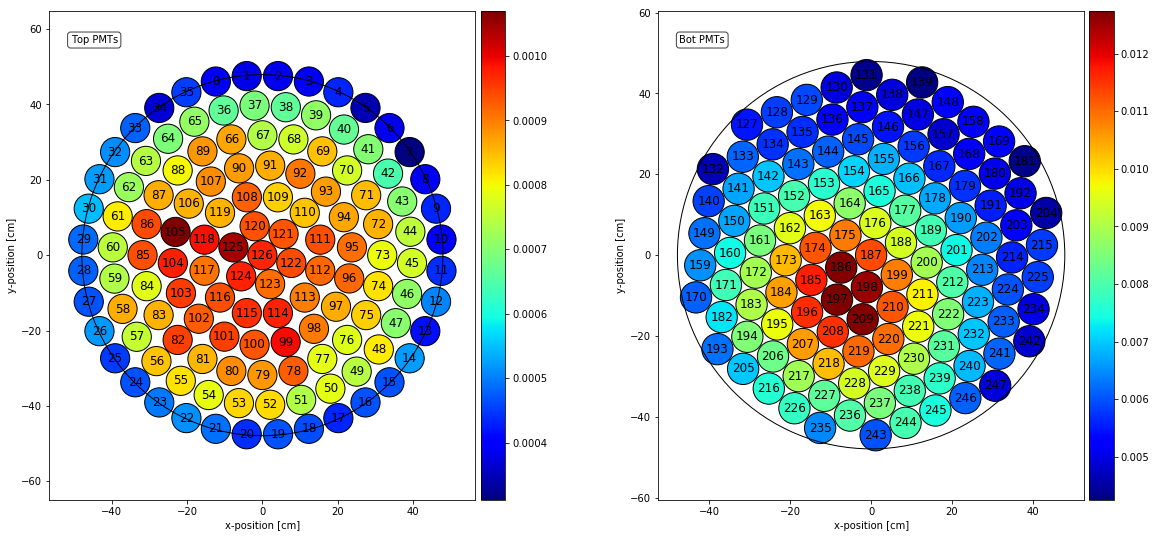

In [47]:
fig = plt.figure(figsize=(20,9))
plt.subplot(121)

patches = []
for ch in range(0,len(top)):
    circle = Circle((top_pos_x[ch],top_pos_y[ch]), 3.875)
    patches.append(circle)
    plt.annotate(str(ch), xy=(top_pos_x[ch],top_pos_y[ch]), fontsize=12, ha='center', va='center')
    
p = PatchCollection(patches, cmap='jet', alpha=1.0, edgecolor='black') # facecolor='none'
p.set_array(np.array(top))
p.set_clim([min(top),max(top)])

ax = plt.gca()
ax.add_collection(p)
ax.add_collection(PatchCollection([Circle((0,0), configuration.load_configuration('XENON1T')['DEFAULT']['tpc_radius'])], 
                                  facecolor='none', edgecolor='black', alpha=1.0))
plt.colorbar(p,ax=ax,pad=0.01) #, label="PMT hits fraction [%]")
ax.text(0.05, 0.95, "Top PMTs", transform=ax.transAxes, horizontalalignment='left',
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.75))

plt.xlabel('x-position [cm]')
plt.ylabel('y-position [cm]')
plt.axis('equal')

plt.subplot(122)

patches = []
for ch in range(0, len(bot)):
    circle = Circle((bot_pos_x[ch],bot_pos_y[ch]), 3.875)
    patches.append(circle)
    plt.annotate(str(ch+len(top)), xy=(bot_pos_x[ch],bot_pos_y[ch]), fontsize=12, ha='center', va='center')
    
p = PatchCollection(patches, cmap='jet', alpha=1.0, edgecolor='black') # facecolor='none'
p.set_array(np.array(bot))
p.set_clim([min(bot),max(bot)])

ax = plt.gca()
ax.add_collection(p)
ax.add_collection(PatchCollection([Circle((0,0), configuration.load_configuration('XENON1T')['DEFAULT']['tpc_radius'])], 
                                  facecolor='none', edgecolor='black', alpha=1.0))
plt.colorbar(p,ax=ax,pad=0.01) #, label="PMT hits fraction [%]")
ax.text(0.05, 0.95, "Bot PMTs", transform=ax.transAxes, horizontalalignment='left',
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.75))

plt.xlabel('x-position [cm]')
plt.ylabel('y-position [cm]')
plt.axis('equal')

In [ ]:
fig = plt.figure(figsize=(20,9))
plt.subplot(121)

patches = []
for ch in range(0,len(top)):
    circle = Circle((top_pos_x[ch], top_pos_y[ch]), 3.875)
    patches.append(circle)
    plt.annotate(str(ch), xy=(top_pos_x[ch], top_pos_y[ch]), fontsize=12, ha='center', va='center')
    
p = PatchCollection(patches, cmap='jet', alpha=1.0, edgecolor='black') # facecolor='none'
p.set_array(np.array(top_df))
p.set_clim([min(top_df),max(top_df)])

ax = plt.gca()
ax.add_collection(p)
ax.add_collection(PatchCollection([Circle((0,0), configuration.load_configuration('XENON1T')['DEFAULT']['tpc_radius'])], 
                                  facecolor='none', edgecolor='black', alpha=1.0))
plt.colorbar(p,ax=ax,pad=0.01) #, label="PMT hits fraction [%]")
ax.text(0.05, 0.95, "Top PMTs", transform=ax.transAxes, horizontalalignment='left',
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.75))

plt.xlabel('x-position [cm]')
plt.ylabel('y-position [cm]')
plt.axis('equal')

plt.subplot(122)

patches = []
for ch in range(0, len(bot)):
    circle = Circle((bot_pos_x[ch],bot_pos_y[ch]), 3.875)
    patches.append(circle)
    plt.annotate(str(ch+len(top)), xy=(bot_pos_x[ch],bot_pos_y[ch]), fontsize=12, ha='center', va='center')
    
p = PatchCollection(patches, cmap='jet', alpha=1.0, edgecolor='black') # facecolor='none'
p.set_array(np.array(bot))
p.set_clim([min(bot),max(bot)])

ax = plt.gca()
ax.add_collection(p)
ax.add_collection(PatchCollection([Circle((0,0), configuration.load_configuration('XENON1T')['DEFAULT']['tpc_radius'])], 
                                  facecolor='none', edgecolor='black', alpha=1.0))
plt.colorbar(p,ax=ax,pad=0.01) #, label="PMT hits fraction [%]")
ax.text(0.05, 0.95, "Bot PMTs", transform=ax.transAxes, horizontalalignment='left',
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.75))

plt.xlabel('x-position [cm]')
plt.ylabel('y-position [cm]')
plt.axis('equal')